<a href="https://colab.research.google.com/github/dkdevAI/AI-Hub/blob/main/yelpReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
URL = "https://www.yelp.com/biz/sea-by-thai-glen-allen"

# CODE

## Install and import dependencies

In [49]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [50]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [51]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

## Instantiate model

In [52]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

## Encode and calculate sentiment

In [53]:
tokens = tokenizer.encode("fuck this shit. It was great", return_tensors="pt")

In [54]:
result = model(tokens)

In [55]:
int(torch.argmax(result.logits))+1

1

## Collect Reviews

In [56]:
r = requests.get(URL)
soup = BeautifulSoup(r.text, "html.parser")
regex = re.compile(".*comment.*")
results = soup.find_all("p", {"class": regex})
reviews = [result.text for result in results]

In [57]:
results

[<p class="comment__09f24__D0cxf css-qgunke"><span class="raw__09f24__T4Ezm" lang="en">Amazing food with amazing customer service! The best Thai food I've had here in RVA/Short Pump!<br/><br/>11/10 recommend coming here!! My family loves it here! We always get seated quickly!</span></p>,
 <p class="comment__09f24__D0cxf css-qgunke"><span class="raw__09f24__T4Ezm" lang="en">Good calamari <br/>Excellent comb pad Thai <br/>Good fulfilling portions as well<br/>Picked up within 25mins of ordering</span></p>,
 <p class="comment__09f24__D0cxf css-qgunke"><span class="raw__09f24__T4Ezm" lang="en">Came here for the first time with a large group of family and friends last night and had a nice experience.<br/><br/>Pros:<br/>- large food and drink selection. loved that there were so many cocktail options<br/>- food and portions were good! Everyone got a variety of noodles, soup, and rice and loved their dish!<br/>- garage parking nearby<br/>- no complaints about the service<br/><br/>Cons:<br/>- Th

## Load Reviews in Dataframe and Score

In [58]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.array(reviews), columns=["review"])

In [59]:
df["review"].iloc[0]

"Amazing food with amazing customer service! The best Thai food I've had here in RVA/Short Pump!11/10 recommend coming here!! My family loves it here! We always get seated quickly!"

In [60]:
def sentiment_score(review):
  tokens = tokenizer.encode(review, return_tensors="pt")
  result = model(tokens)
  return int(torch.argmax(result.logits))+1

In [61]:
sentiment_score(df["review"].iloc[1])

5

In [62]:
df["sentiment"] = df["review"].apply(lambda x:sentiment_score(x[:512]))

In [63]:
df["review"]

0    Amazing food with amazing customer service! Th...
1    Good calamari Excellent comb pad Thai Good ful...
2    Came here for the first time with a large grou...
3    I don't get to eat Thai food as much as I woul...
4    Solid and consistent Thai food in Short Pump. ...
5    I hate that I have to leave a negative review ...
6    Sea By Thai Ratings: 4.2/5Food: 4.5/5 - This i...
7    Giving this restaurant three stars because the...
8    Short review:The good: pretty neat and bright ...
9    A little bit of the Christmas story feel going...
Name: review, dtype: object

# Inference

In [64]:
df

,review,sentiment
0,Amazing food with amazing customer service! Th...,5
1,Good calamari Excellent comb pad Thai Good ful...,5
2,Came here for the first time with a large grou...,2
3,I don't get to eat Thai food as much as I woul...,4
4,Solid and consistent Thai food in Short Pump. ...,4
5,I hate that I have to leave a negative review ...,2
6,Sea By Thai Ratings: 4.2/5Food: 4.5/5 - This i...,4
7,Giving this restaurant three stars because the...,3
8,Short review:The good: pretty neat and bright ...,3
9,A little bit of the Christmas story feel going...,4


array([[<Axes: title={'center': 'sentiment'}>]], dtype=object)

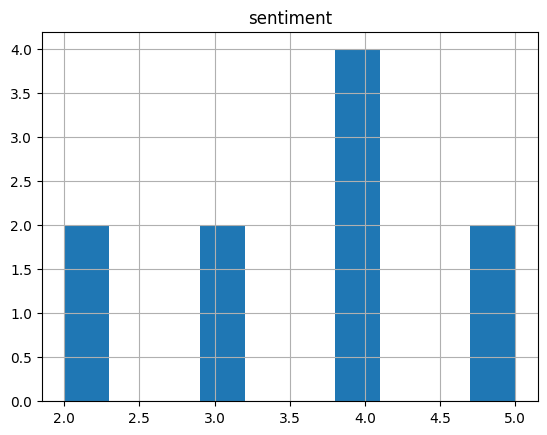

In [65]:
df.hist()

In [67]:
df["sentiment"].mean()

3.6